In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
df = pd.read_csv('data.csv')
df

,Collectionq,Location,Box,Folder,Series,Subseries,Description
0,Glenn,01-7-23-20-01-0-1,1.0,1.0,Personal/Political,Administrative Assistants,"William R. White - Memoranda - received, 1977."
1,Glenn,01-7-23-20-01-0-1,1.0,2.0,Personal/Political,Administrative Assistant,"William R. White - Memoranda - received, Janua..."
2,Glenn,01-7-23-20-01-0-1,1.0,3.0,Personal/Political,Administrative Assistant,"William R. White - Memoranda - received, July ..."
3,Glenn,01-7-23-20-01-0-1,1.0,4.0,Personal/Political,Administrative Assistant,"William R. White - Memoranda - received, 1979."
4,Glenn,01-7-23-20-01-0-1,1.0,5.0,Personal/Political,Administrative Assistant,"William R. White - Memoranda - received, 1980."
...,...,...,...,...,...,...,...
23924,Regula,01-7-33-14-04-0-1,125.0,18.0,Audiovisual,Videos,Fox News story about Chinese made quilts sold ...
23925,Regula,01-7-33-14-04-0-1,125.0,19.0,Audiovisual,Videos,"Hamilton Productions, Inc.'s ""Watch on Washing..."
23926,Regula,01-7-33-14-04-0-1,125.0,20.0,Audiovisual,Videos,NBC News story on automated telephone answerin...
23927,Regula,01-7-33-14-04-0-1,125.0,21.0,Audiovisual,Videos,National Republican Congressional Committee pr...


In [3]:
df['Subseries'] = df['Subseries'].replace('Administrative Assistant', 'Administrative Assistants')
df = df[(df['Subseries'] == 'Administrative Assistants') | (df['Subseries'] == 'Administrative Assistant')]

In [4]:
df['Description']

0         William R. White - Memoranda - received, 1977.
1      William R. White - Memoranda - received, Janua...
2      William R. White - Memoranda - received, July ...
3         William R. White - Memoranda - received, 1979.
4         William R. White - Memoranda - received, 1980.
                             ...                        
586    Mary Jane Veno - Telephone Logs, October - Dec...
587    Mary Jane Veno - Telephone Logs, January - Apr...
588    Mary Jane Veno - Telephone Logs, April 14 - Au...
589    Mary Jane Veno - Telephone Logs, October 1999 ...
590    Mary Jane Veno - Rolodex Telephone Files (3), ...
Name: Description, Length: 591, dtype: object

In [5]:
third_row = df['Description']
third_row

0         William R. White - Memoranda - received, 1977.
1      William R. White - Memoranda - received, Janua...
2      William R. White - Memoranda - received, July ...
3         William R. White - Memoranda - received, 1979.
4         William R. White - Memoranda - received, 1980.
                             ...                        
586    Mary Jane Veno - Telephone Logs, October - Dec...
587    Mary Jane Veno - Telephone Logs, January - Apr...
588    Mary Jane Veno - Telephone Logs, April 14 - Au...
589    Mary Jane Veno - Telephone Logs, October 1999 ...
590    Mary Jane Veno - Rolodex Telephone Files (3), ...
Name: Description, Length: 591, dtype: object

In [6]:
import re
import pandas as pd

# Initialize empty lists for month, date, and year
months = []
dates = []
years = []

# Iterate over each line in third_row
for line in third_row:
    # Find month using regex pattern
    month_match = re.search(r'(January|February|March|April|May|June|July|August|September|October|November|December)', line)
    if month_match:
        months.append(month_match.group(0))
    else:
        months.append(None)
    
    # Find date using regex pattern
    date_match = re.search(r'(\b\d{1,2}\b)', line)
    if date_match:
        dates.append(date_match.group(0))
    else:
        dates.append(None)
    
    # Find year using regex pattern
    year_match = re.search(r'(\b19\d{2}\b|\b20\d{2}\b)', line)
    if year_match:
        years.append(year_match.group(0))
    else:
        years.append(None)

# Create new DataFrame new_df
new_df = pd.DataFrame({'month': months, 'date': dates, 'year': years})
new_df

,month,date,year
0,None,None,1977
1,January,None,1978
2,July,None,1978
3,None,None,1979
4,None,None,1980
...,...,...,...
586,October,None,1998
587,January,13,1999
588,April,14,1999
589,October,None,1999


<AxesSubplot: >

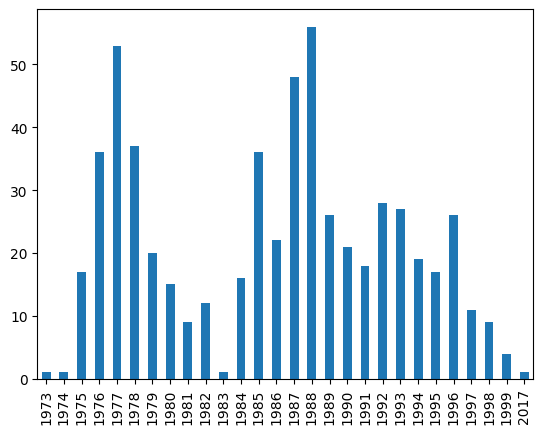

In [7]:
new_df['year'].value_counts().sort_index().plot(kind='bar')